In [349]:
text_1_allende = open("dos_palabras_allende.txt", "r")
text_2_allende = open("boca_de_sapo_allende.txt", "r")
text_3_marquez = open('cronica_de_una_muerte_anunciada_marquez.txt', 'r')

stop_words = [
 '.', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014' ]

def text_analysis(text):
    d_1 = dict()
    for line in text:
        line = line.strip()
        line = line.lower()
        for k in stop_words:
            line = line.replace(k, ' ')
        words = line.split(' ')

        for word in words:
            if word in d_1:
                d_1[word] += 1
            else: 
                d_1[word] = 1

    most_used_words, longest_words = [], []
    #most commonly used words
    while len(most_used_words) < 20:#len(max_twenty__words) < 20:
        M = max(d_1, key=d_1.get)
        most_used_words.append(str(M))
        d_1.pop(M)
    #longest words
    while len(longest_words)< 20:
        L =max(d_1, key=len)
        longest_words.append(str(L))
        d_1.pop(L)
    return(most_used_words, longest_words)


In [350]:
text_1_most, text_1_longest = text_analysis(text_1_allende)
text_2_most, text_2_longest = text_analysis(text_2_allende)
text_3_most, text_3_longest = text_analysis(text_3_marquez)

In [351]:
from math import log10, floor

text_1_allende = open("dos_palabras_allende.txt", "r")
text_2_allende = open("boca_de_sapo_allende.txt", "r")
text_3_marquez = open('cronica_de_una_muerte_anunciada_marquez.txt', 'r')

stop_words = [
 '.', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014' ]

female_words = ['la', 'las', 'cuya', 'cuyas', 'nuestra', 'nosotras', 'vosotras', 'mujer', 'hembra', 'hija']
male_words = ['él', 'lo', 'hombre', 'varón', 'cuyo']

def gender_analysis(text):
    d = dict()
    for line in text:
        line = line.strip()
        line = line.lower()
        for k in stop_words:
            line = line.replace(k, ' ')
        words = line.split(' ')

        for word in words:
            if word in d:
                d[word] += 1
            else: 
                d[word] = 1
        total = sum(d.values())
    female, male = dict(), dict()
    for word in female_words:
        if word in d:
            sig_fig = round(d[word]/total, 2-int(floor(log10(abs(d[word]/total))))-1)
            female[word] = sig_fig
        else:
            female[word] = 0
    for word in male_words:
        if word in d:
            male[word] = d[word]/total
        else:
            male[word] = 0
    return(female, male)

In [352]:
female_1, male_1 = gender_analysis(text_1_allende)
female_2, male_2 = gender_analysis(text_2_allende)
female_3, male_3 = gender_analysis(text_3_marquez)

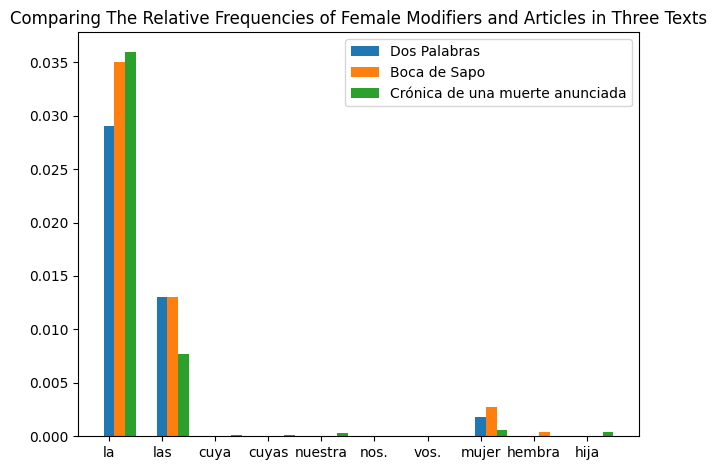

In [353]:
import numpy as np
import matplotlib.pyplot as plt
female_words_shortened = ['la', 'las', 'cuya', 'cuyas', 'nuestra', 'nos.', 'vos.', 'mujer', 'hembra', 'hija']

X_axis = np.arange(len(female_words_shortened))+.5
plt.bar(X_axis, female_1.values(), 0.2, label = "Dos Palabras")
plt.bar(X_axis + 0.2, female_2.values(), 0.2, label = "Boca de Sapo")
plt.bar(X_axis + 0.4, female_3.values(), 0.2, label = "Crónica de una muerte anunciada")
plt.xticks(X_axis, labels=female_words_shortened)
plt.title("Comparing The Relative Frequencies of Female Modifiers and Articles in Three Texts")
plt.legend()
plt.tight_layout()



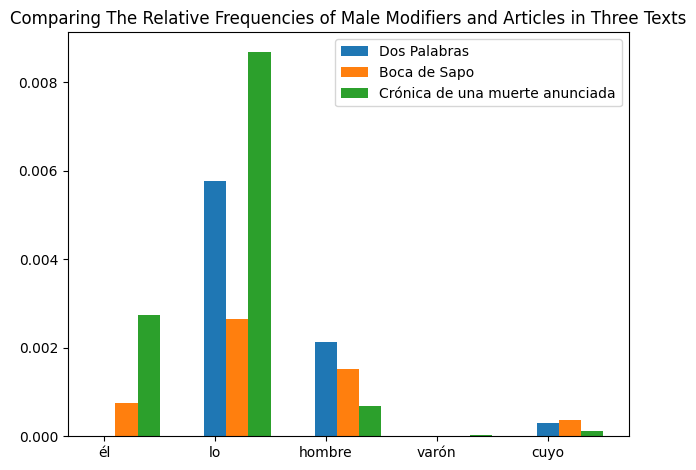

In [356]:
import numpy as np
import matplotlib.pyplot as plt

X_axis = np.arange(len(male_words))
plt.bar(X_axis , male_1.values(), 0.2, label = "Dos Palabras")
plt.bar(X_axis + 0.2, male_2.values(), 0.2, label = "Boca de Sapo")
plt.bar(X_axis + 0.4, male_3.values(), 0.2, label = "Crónica de una muerte anunciada")
plt.xticks(X_axis, labels=male_words)
plt.title("Comparing The Relative Frequencies of Male Modifiers and Articles in Three Texts")
plt.legend()
plt.tight_layout()